# New Section

In [ ]:
#######Alpha iran

In [ ]:
##########infection

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alpha-Delta dataset.csv to Alpha-Delta dataset.csv


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Alpha_Iran'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Alpha_Iran'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

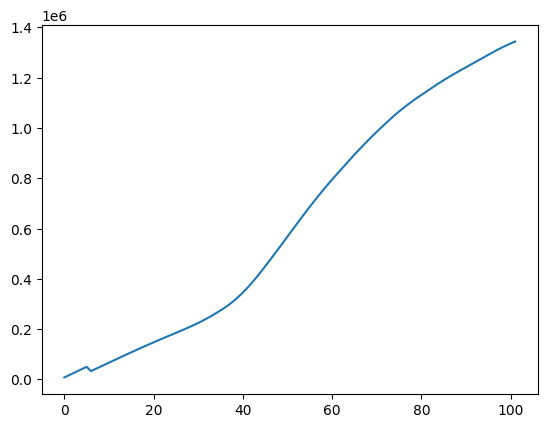

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['infection_Alpha_Iran'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.647694
p-value: 0.859837


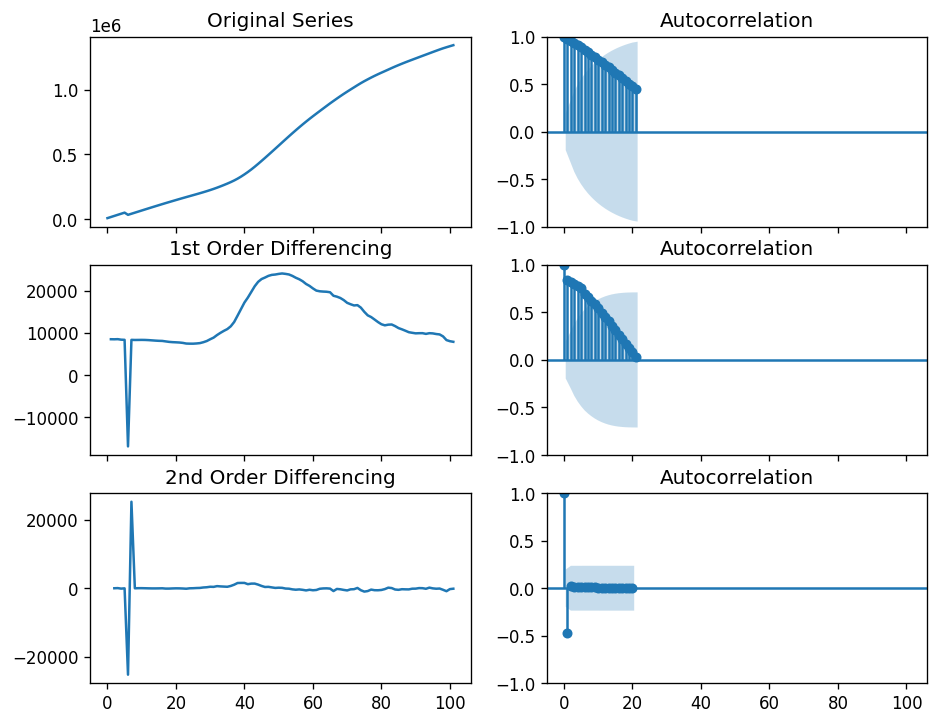

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['infection_Alpha_Iran']); axes[0, 0].set_title('Original Series')
plot_acf(df['infection_Alpha_Iran'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['infection_Alpha_Iran'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['infection_Alpha_Iran'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['infection_Alpha_Iran'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['infection_Alpha_Iran'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


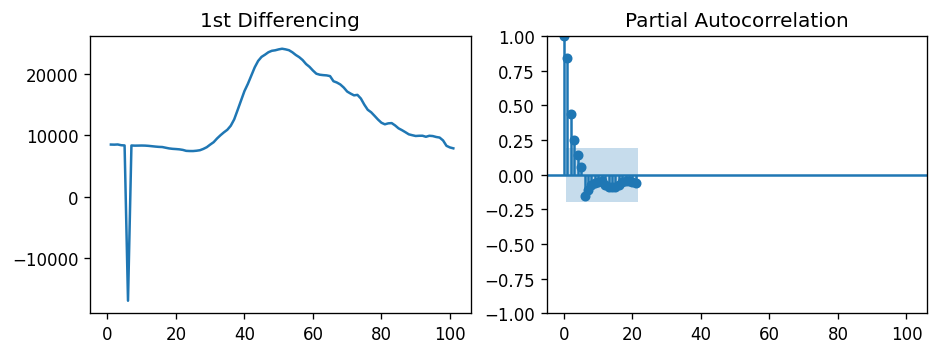

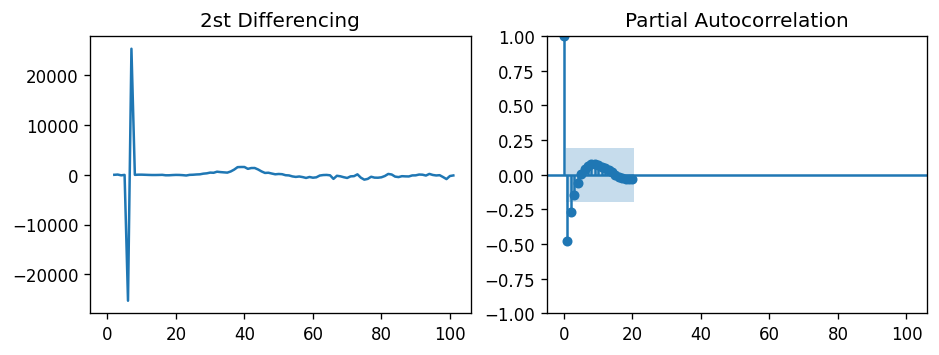

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Alpha_Iran'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Alpha_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()


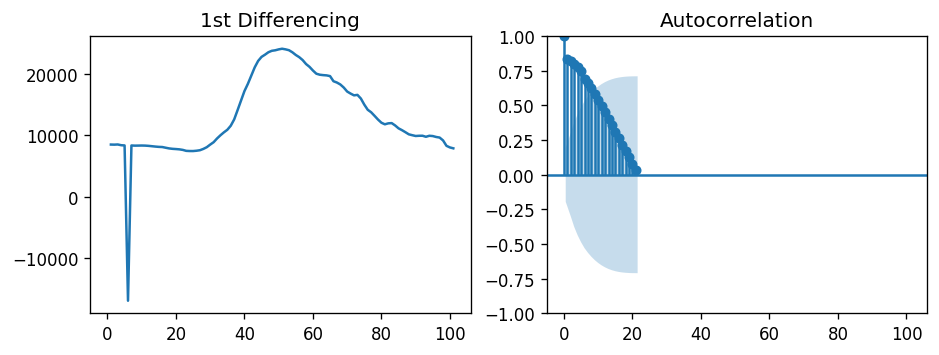

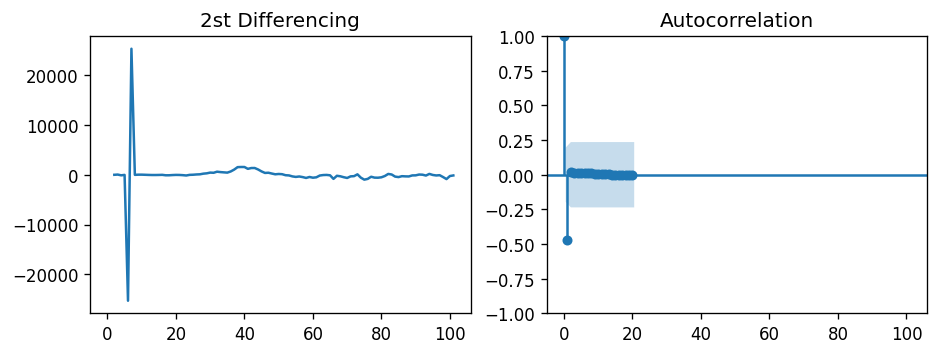

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Alpha_Iran'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Alpha_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Alpha_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()




                                SARIMAX Results                                 
Dep. Variable:     infection_Alpha_Iran   No. Observations:                   95
Model:                   ARIMA(2, 1, 1)   Log Likelihood                -890.383
Date:                  Fri, 14 Apr 2023   AIC                           1788.765
Time:                          11:57:53   BIC                           1798.938
Sample:                               0   HQIC                          1792.874
                                   - 95                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8743      0.086     10.132      0.000       0.705       1.043
ar.L2          0.1215      0.083      1.463      0.143      -0.041       0.284
ma.L1         -0.5038      0.089    

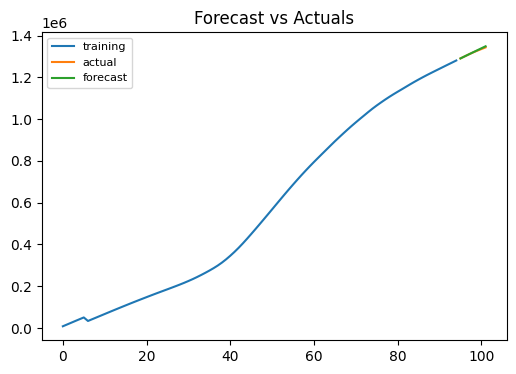

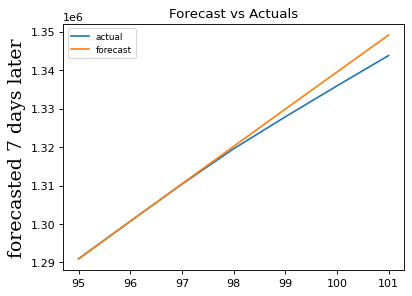

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['infection_Alpha_Iran'][:len(df)-n_future]
test = df['infection_Alpha_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(2, 1, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot

font1 = {'family':'Serif','color':'black','size':17}

plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()



In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.001254758830474856,
 'me': 1649.9339081091207,
 'mae': 1677.1683087157019,
 'mpe': 0.001233700103798182,
 'rmse': 2557.5400399664513}

                                SARIMAX Results                                 
Dep. Variable:     infection_Alpha_Iran   No. Observations:                   88
Model:                   ARIMA(3, 1, 1)   Log Likelihood                -827.293
Date:                  Fri, 14 Apr 2023   AIC                           1664.585
Time:                          12:00:11   BIC                           1676.915
Sample:                               0   HQIC                          1669.550
                                   - 88                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7774      0.258      3.018      0.003       0.272       1.282
ar.L2          0.1268      0.129      0.983      0.326      -0.126       0.379
ar.L3          0.0915      0.149    

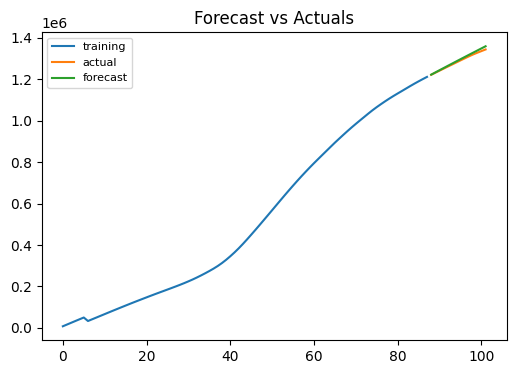

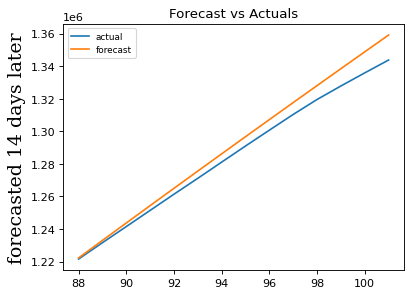

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['infection_Alpha_Iran'][:len(df)-n_future]
test = df['infection_Alpha_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(3, 1, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.004762331147911068,
 'me': 6233.433715033777,
 'mae': 6233.433715033777,
 'mpe': 0.004762331147911068,
 'rmse': 7517.062570841351}

                                SARIMAX Results                                 
Dep. Variable:     infection_Alpha_Iran   No. Observations:                   81
Model:                   ARIMA(3, 1, 1)   Log Likelihood                -764.020
Date:                  Fri, 14 Apr 2023   AIC                           1538.039
Time:                          12:03:26   BIC                           1549.949
Sample:                               0   HQIC                          1542.814
                                   - 81                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7846      0.277      2.830      0.005       0.241       1.328
ar.L2          0.1231      0.139      0.885      0.376      -0.150       0.396
ar.L3          0.0892      0.162    

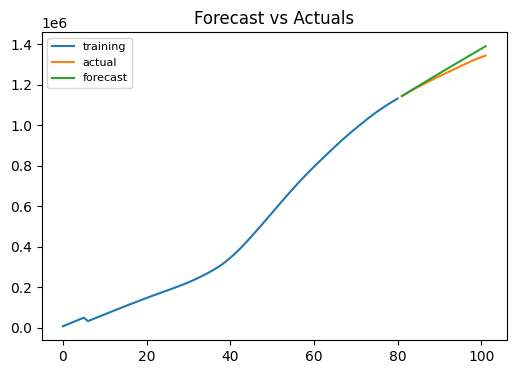

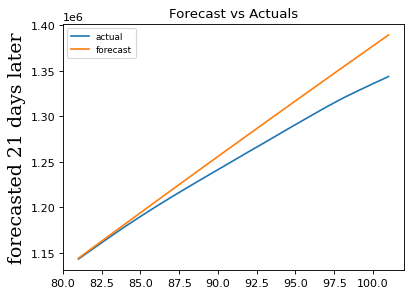

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['infection_Alpha_Iran'][:len(df)-n_future]
test = df['infection_Alpha_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(3, 1, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.014226516445041134,
 'me': 18383.82320756127,
 'mae': 18383.82320756127,
 'mpe': 0.014226516445041134,
 'rmse': 22938.651274448497}

In [ ]:
#########

In [ ]:
##deaths

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Alpha_Iran'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Alpha_Iran'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

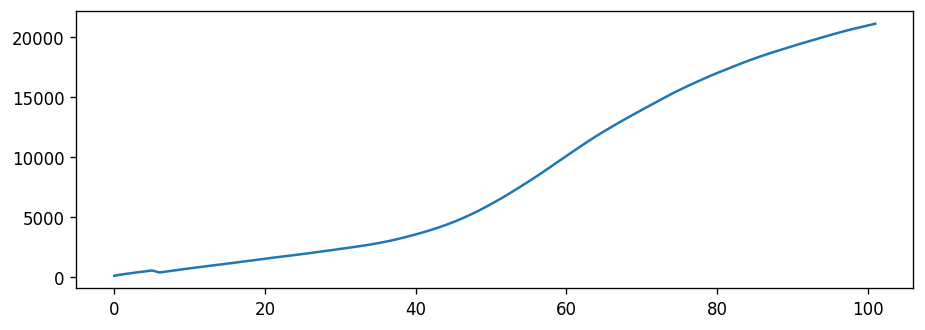

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['death_Alpha_Iran'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.209967
p-value: 0.202648


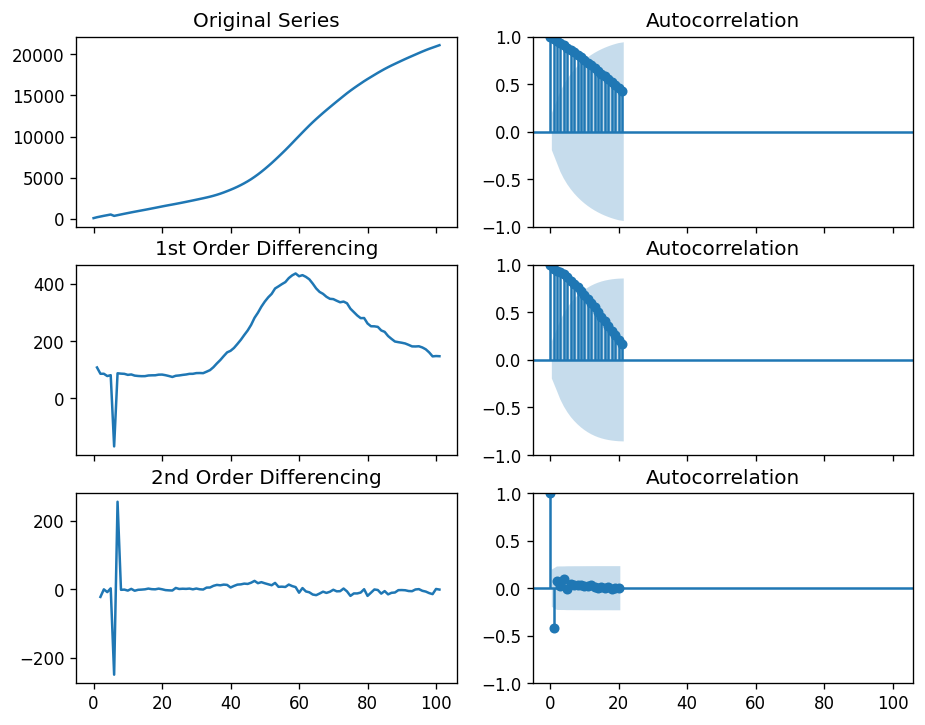

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['death_Alpha_Iran']); axes[0, 0].set_title('Original Series')
plot_acf(df['death_Alpha_Iran'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['death_Alpha_Iran'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['death_Alpha_Iran'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['death_Alpha_Iran'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['death_Alpha_Iran'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


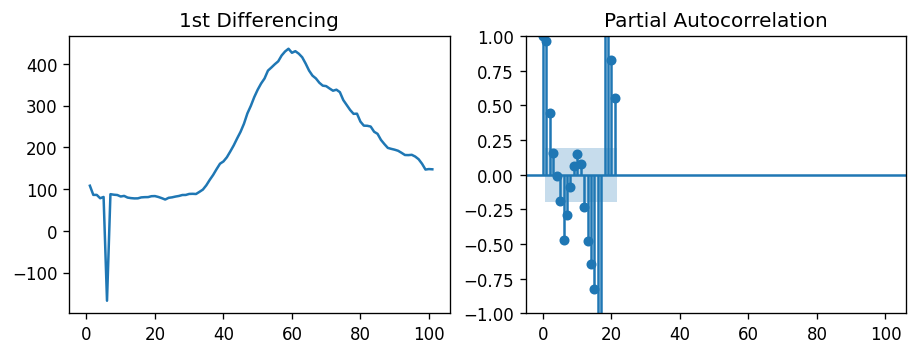

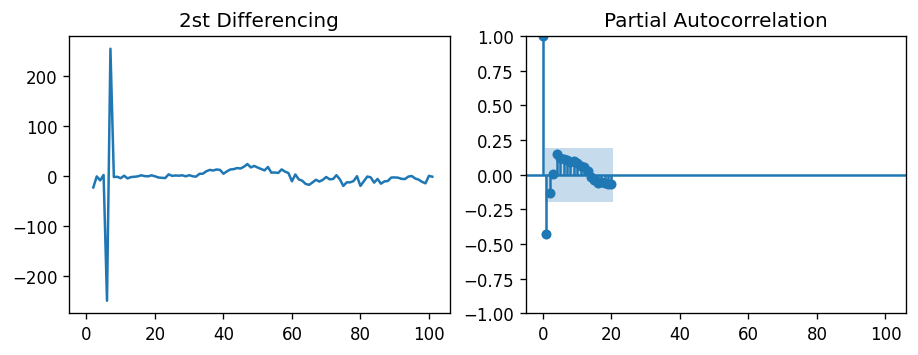

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Alpha_Iran'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Alpha_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()

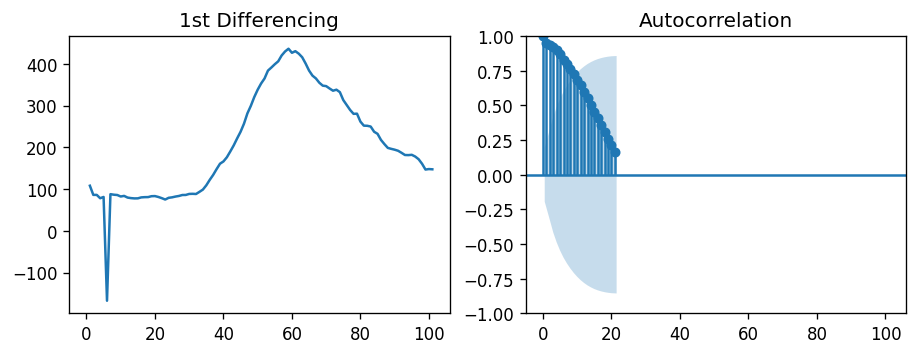

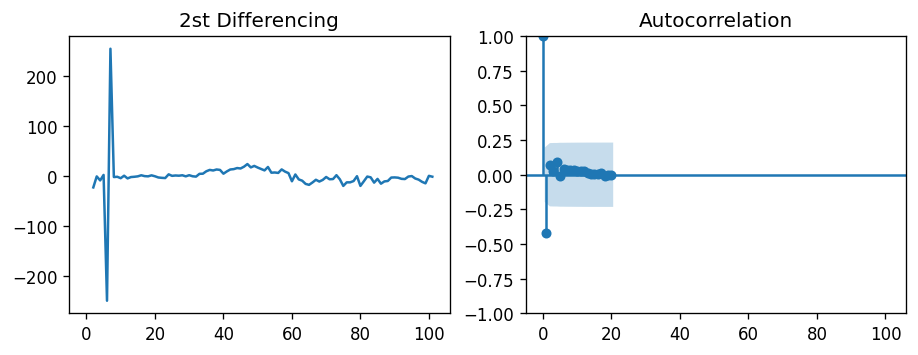

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Alpha_Iran'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Alpha_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Alpha_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:       death_Alpha_Iran   No. Observations:                   95
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -456.775
Date:                Fri, 14 Apr 2023   AIC                            923.550
Time:                        12:05:30   BIC                            936.213
Sample:                             0   HQIC                           928.663
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0553      0.117      8.994      0.000       0.825       1.285
ar.L2         -0.1376      0.113     -1.223      0.221      -0.358       0.083
ma.L1         -1.6235      0.198     -8.199      0.0

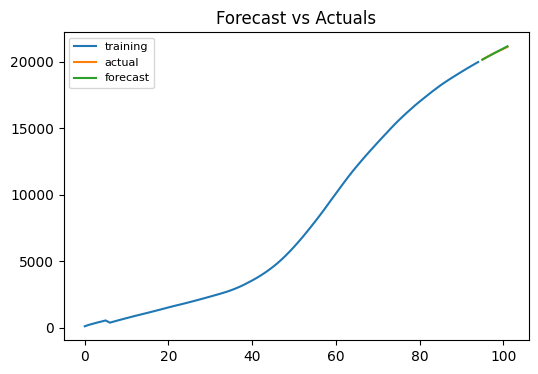

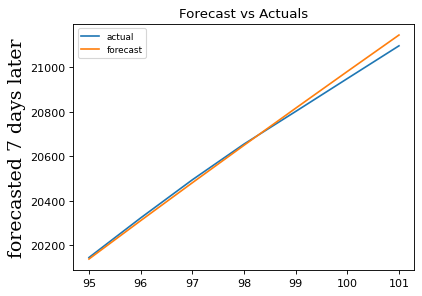

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['death_Alpha_Iran'][:len(df)-n_future]
test = df['death_Alpha_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0009101406327168018,
 'me': 8.190396588087294,
 'mae': 18.95534879367759,
 'mpe': 0.0003824109235657144,
 'rmse': 23.860392324385245}

                               SARIMAX Results                                
Dep. Variable:       death_Alpha_Iran   No. Observations:                   88
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -425.734
Date:                Fri, 14 Apr 2023   AIC                            861.467
Time:                        12:07:05   BIC                            873.739
Sample:                             0   HQIC                           866.406
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0470      0.128      8.207      0.000       0.797       1.297
ar.L2         -0.1291      0.122     -1.061      0.289      -0.367       0.109
ma.L1         -1.6162      0.214     -7.567      0.0

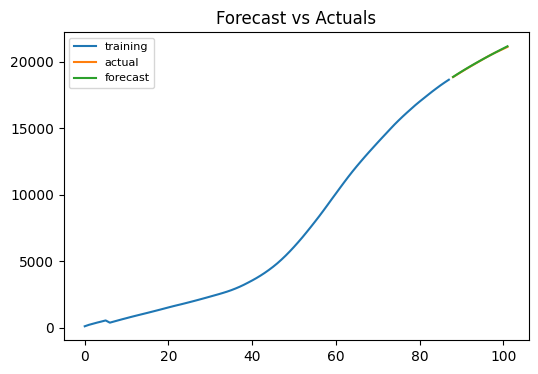

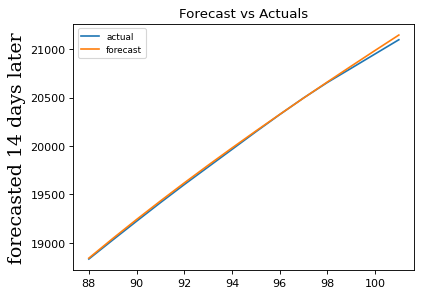

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['death_Alpha_Iran'][:len(df)-n_future]
test = df['death_Alpha_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0008143223322350402,
 'me': 16.315405524566813,
 'mae': 16.439184262274598,
 'mpe': 0.0008082827456967619,
 'rmse': 20.64147582106919}

                               SARIMAX Results                                
Dep. Variable:       death_Alpha_Iran   No. Observations:                   81
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -400.577
Date:                Fri, 14 Apr 2023   AIC                            813.154
Time:                        12:07:37   BIC                            827.446
Sample:                             0   HQIC                           818.884
                                 - 81                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9188      0.185     10.390      0.000       1.557       2.281
ar.L2         -0.9208      0.184     -4.997      0.000      -1.282      -0.560
ma.L1         -1.5109      0.286     -5.291      0.0

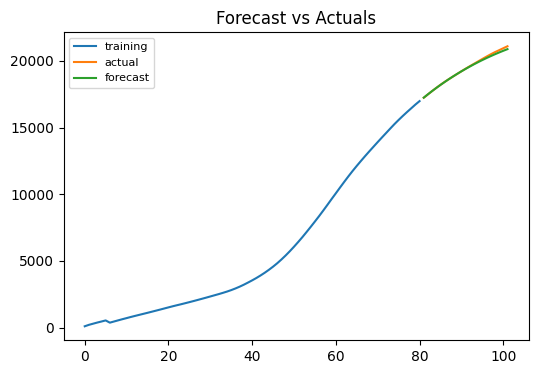

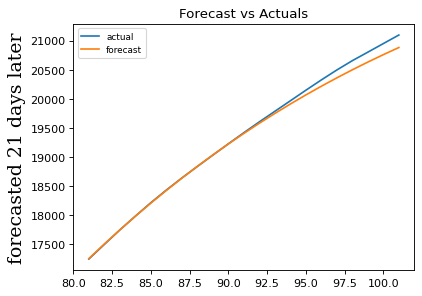

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['death_Alpha_Iran'][:len(df)-n_future]
test = df['death_Alpha_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(2, 1, 3))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.002854536068582369,
 'me': -56.63941665238235,
 'mae': 58.57752450082764,
 'mpe': -0.0027449559229351067,
 'rmse': 92.35018863882131}